In [1]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import layers
from keras import models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
original_dataset_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
base_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
# os.mkdir(base_dir)


In [7]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=20,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=20,
    class_mode='categorical'
)

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 224, 224, 3)
labels batch shape:  (20, 4)


In [10]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)
model.save('doggos_1.h5')

Epoch 1/30
60/60 [==============================] - 315s 5s/step - loss: 1.4435 - acc: 0.3000 - val_loss: 1.5139 - val_acc: 0.2300
Epoch 2/30
60/60 [==============================] - 308s 5s/step - loss: 1.2611 - acc: 0.4408 - val_loss: 1.6663 - val_acc: 0.1900
Epoch 3/30
60/60 [==============================] - 267s 4s/step - loss: 1.1537 - acc: 0.4975 - val_loss: 1.7174 - val_acc: 0.1775
Epoch 4/30
60/60 [==============================] - 345s 6s/step - loss: 1.0294 - acc: 0.5767 - val_loss: 1.8802 - val_acc: 0.1750
Epoch 5/30
60/60 [==============================] - 296s 5s/step - loss: 0.9170 - acc: 0.6558 - val_loss: 1.8928 - val_acc: 0.1725
Epoch 6/30
60/60 [==============================] - 262s 4s/step - loss: 0.7815 - acc: 0.7308 - val_loss: 2.1986 - val_acc: 0.1825
Epoch 7/30
60/60 [==============================] - 310s 5s/step - loss: 0.6371 - acc: 0.7958 - val_loss: 2.3556 - val_acc: 0.1900
Epoch 8/30
60/60 [==============================] - 563s 9s/step - loss: 0.5206 - a

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [12]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

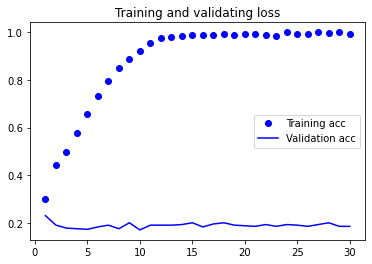

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validating loss')
plt.legend()
plt.figure()

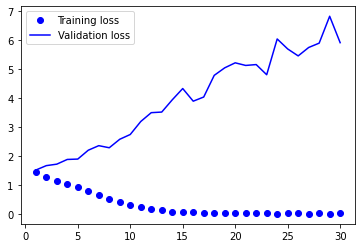

In [14]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()